In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/gurgaon_properties_cleaned_v2.csv')

In [3]:
df.drop_duplicates()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,flat,pivotal devaan,sector 84,0.37,6346.0,583.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2,2,1,...,583.0,NaN,483.0,0,0,0,0,0,0,73
3799,house,international city by sobha phase 1,sector 109,6.00,9634.0,6228.0,Plot area 692(578.6 sq.m.),5,5,3+,...,NaN,6228.0,NaN,1,1,1,1,0,0,160
3800,flat,ansal api celebrity suites,sector 2,0.60,8163.0,735.0,Super Built up area 735(68.28 sq.m.),1,1,1,...,735.0,NaN,NaN,0,0,0,0,0,1,67
3801,house,independent,sector 43,15.50,28233.0,5490.0,Plot area 610(510.04 sq.m.),5,6,3,...,NaN,5490.0,NaN,1,1,1,1,0,0,76


<Axes: ylabel='Frequency'>

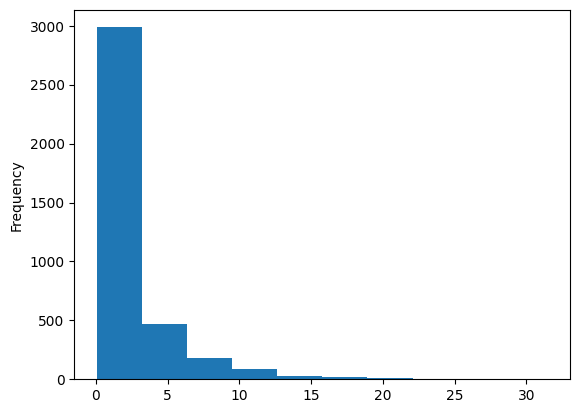

In [4]:
df['price'].plot(kind = 'hist')

<Axes: ylabel='price'>

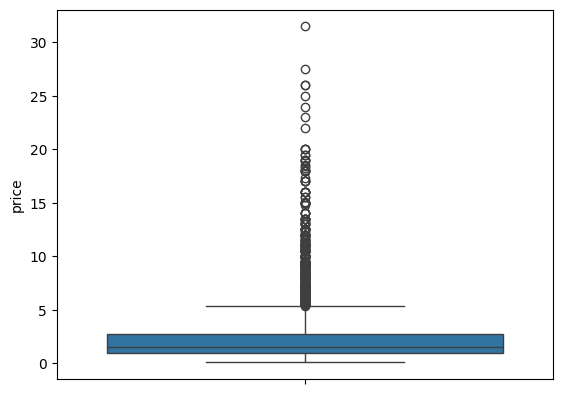

In [8]:
sns.boxplot(df['price'])

In [12]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

lower_bound = q1 - 1.5 * (q3 - q1)
upper_bound = q3 + 1.5 * (q3 - q1)

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]


outliers['price'].describe()

,price
count,432.000000
mean,9.196157
std,4.061291
min,5.350000
25%,6.400000
50%,8.000000
75%,10.607500
max,31.500000


<Axes: xlabel='price_per_sqft', ylabel='Density'>

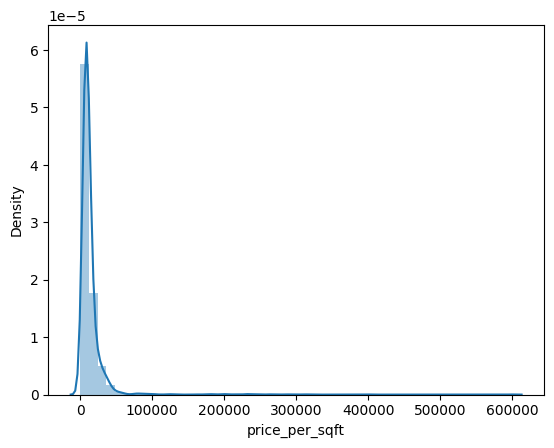

In [15]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

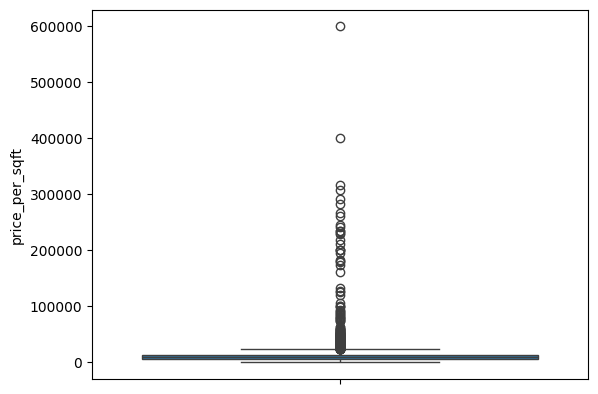

In [16]:
sns.boxplot(df['price_per_sqft'])

In [17]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)

lower_bound = q1 - 1.5 * (q3 - q1)
upper_bound = q3 + 1.5 * (q3 - q1)

outliers_price_per_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]


outliers_price_per_sqft['price_per_sqft'].describe()

,price_per_sqft
count,367.000000
mean,52115.435967
std,60746.225927
min,24202.000000
25%,27778.000000
50%,33333.000000
75%,41790.000000
max,600000.000000


In [18]:
pd.set_option('display.max_columns', None)

In [19]:
outliers_price_per_sqft.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,dlf city phase 1,sector 26,4.50,33333.0,1350.0,Plot area 150(125.42 sq.m.),3,3,2,2.0,East,Moderately Old,NaN,1350.0,NaN,1,1,0,0,0,0,70
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
25,house,independent,sector 41,9.00,27778.0,3240.0,Plot area 360(301.01 sq.m.),8,5,3+,3.0,NaN,Old Property,NaN,3240.0,NaN,0,1,1,1,0,1,26
26,house,independent,sector 41,7.00,28283.0,2475.0,Plot area 275(229.94 sq.m.),7,7,3+,3.0,South-West,Moderately Old,NaN,2475.0,NaN,1,1,1,1,0,2,151
39,house,vipul tatvam villa,sector 48,8.25,38194.0,2160.0,Plot area 350(292.64 sq.m.)Built Up area: 300 ...,4,4,3+,3.0,North-East,Relatively New,NaN,300.0,240.0,0,1,1,0,0,1,160


on observing the data i realized that the rows ehich are having the area col having less than 1000 are in sq yards so multiplying them 9 makes then right

In [20]:
outliers_price_per_sqft['area'] = outliers_price_per_sqft['area'].apply(lambda x: x * 9 if x < 1000 else x)

In [21]:
outliers_price_per_sqft['price_per_sqft'] = round(outliers_price_per_sqft['price']*10000000 / outliers_price_per_sqft['area'])

In [22]:
outliers_price_per_sqft['price_per_sqft'].describe()

,price_per_sqft
count,367.000000
mean,29160.735695
std,12308.413881
min,2689.000000
25%,25051.500000
50%,29630.000000
75%,35489.000000
max,82540.000000


In [23]:
df.update(outliers_price_per_sqft)

<Axes: xlabel='price_per_sqft', ylabel='Density'>

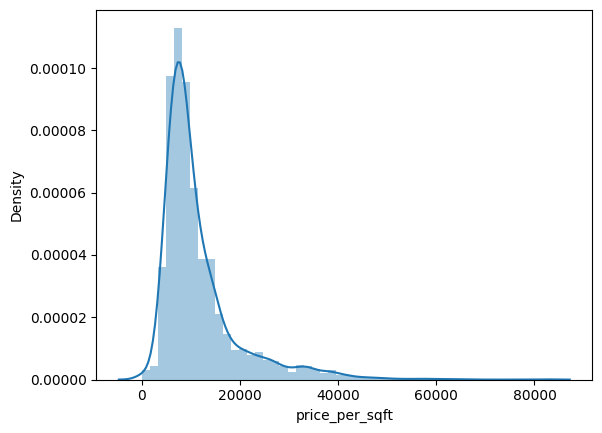

In [24]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

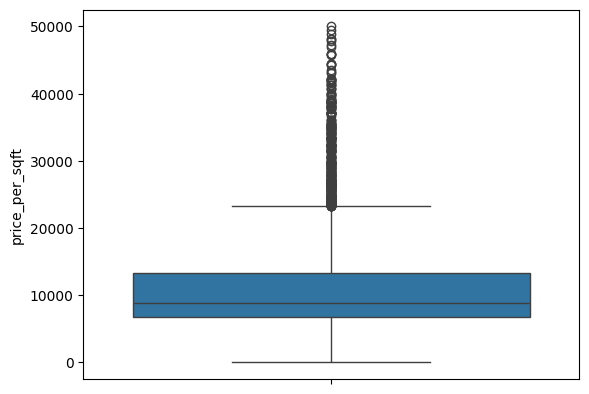

In [28]:
sns.boxplot(df['price_per_sqft'])

In [27]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='area', ylabel='Density'>

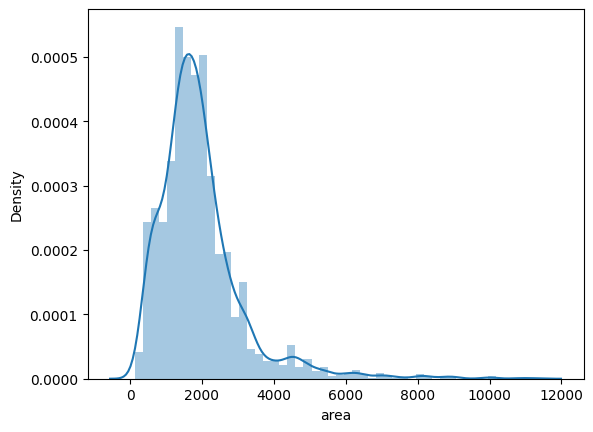

In [45]:
sns.distplot(df['area'])

<Axes: ylabel='area'>

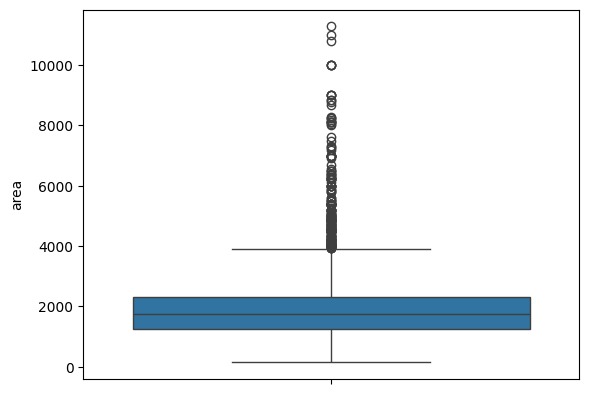

In [46]:
sns.boxplot(df['area'])

In [47]:
df[df['area'] > 10000].sort_values('area',ascending = False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60
747,house,independent,sohna road,5.5,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,3,3,3+,2.0,West,Moderately Old,NaN,3500.0,NaN,1,1,0,1,1,0,49


In [40]:
df.drop(index = [818,1796,2,1123,2356,115,3649,2503,1471],inplace= True)

In [44]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5880
df.loc[1358 ,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

<Axes: xlabel='bedRoom', ylabel='Density'>

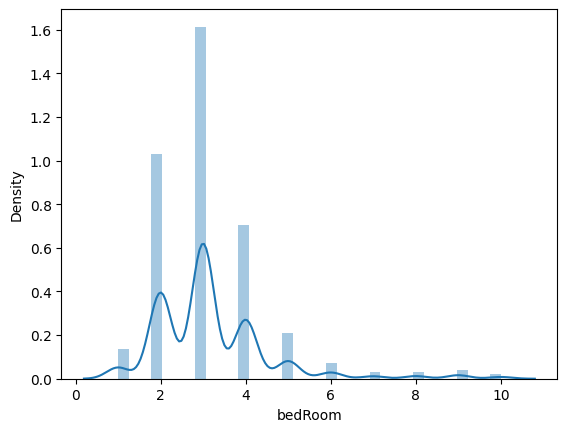

In [58]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

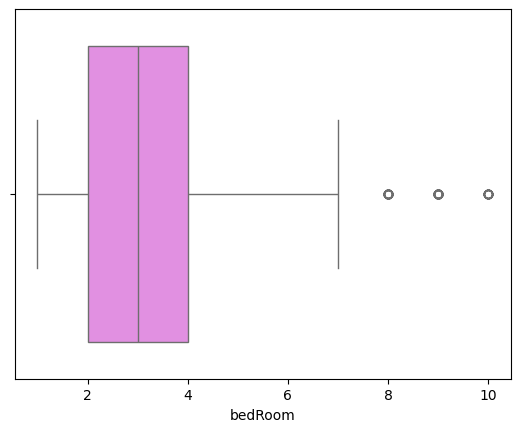

In [59]:
sns.boxplot(x = df['bedRoom'],color='violet')

In [54]:
outliers_bedroom = df[df['bedRoom'] > 10].sort_values('bedRoom',ascending = False)

In [57]:
df = df[df['bedRoom'] <= 10]

<Axes: xlabel='luxury_score', ylabel='Density'>

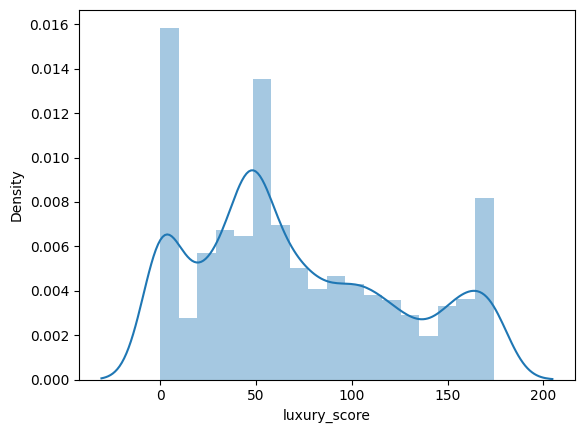

In [61]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

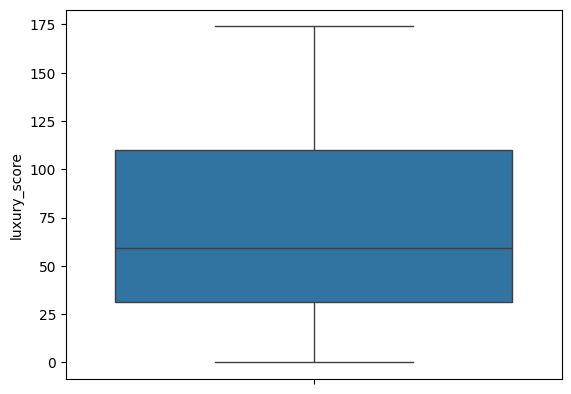

In [62]:
sns.boxplot(df['luxury_score'])

In [63]:
df['price_per_sqft'] = round(df['price']*10000000/df['area'])